In [138]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import islice
import random
import scipy.stats as ss
import networkx.algorithms.community as community

In [2]:
DiG = nx.read_edgelist(path = "Network-Analysis-Project/citation.edgelist", create_using=nx.DiGraph())
print(nx.info(DiG))

Name: 
Type: DiGraph
Number of nodes: 27770
Number of edges: 352807
Average in degree:  12.7046
Average out degree:  12.7046


In [3]:
# compute centrality (degree, betweenness, closeness) of nodes
def centrality(G, k = None, normalized = True, distance=None, seed=None):
    centrality = {}
    centrality["degree"] = nx.degree_centrality(G)
    centrality["inDegree"] = nx.in_degree_centrality(G)
    centrality["outDegree"] = nx.out_degree_centrality(G)
    centrality["betweeness"] = nx.betweenness_centrality(G, k=k, normalized=normalized, seed=seed)
    centrality["closeness"] = nx.closeness_centrality(G, distance=distance)
    return centrality


In [4]:
centrality = centrality(DiG, seed = 123)

KeyboardInterrupt: 

In [102]:
centrality = pklLoad("centrality.pkl")

In [95]:
# compute correlation between different centrality measures
import pandas as pd

centrality_df = pd.DataFrame()
centrality_df['degree'] = centrality['degree'].values()
centrality_df['betweenness'] = centrality['betweeness'].values()
centrality_df['closeness'] = centrality['closeness'].values()

/home/kaizhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


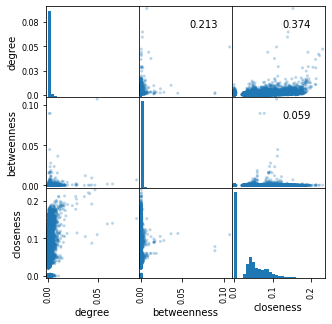

In [96]:
corr = centrality_df.corr().as_matrix()
axes = pd.plotting.scatter_matrix(centrality_df, alpha=0.3, figsize=(5,5), hist_kwds={'bins':30})
new_labels = [round(float(i.get_text()), 2) for i in axes[0,0].get_yticklabels()]
axes[0,0].set_yticklabels(new_labels)

for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.7, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.savefig("centrality_correlation.png", dpi=600)

In [3]:
import pickle
def pklDump(obj, file):
    objF = open(file, 'wb')
    pickle.dump(obj, objF)
    objF.close()

def pklLoad(file): 
    objF = open(file, 'rb')
    obj = pickle.load(objF)
    objF.close()
    return obj

In [8]:
pklDump(centrality, "centrality.pkl")

In [8]:
# randomly selected 5000 nodes for visualization and graph partition
subG = DiG.subgraph(random.sample(DiG.nodes(), 5000))

In [9]:
print(nx.info(subG))

Name: 
Type: DiGraph
Number of nodes: 5000
Number of edges: 11408
Average in degree:   2.2816
Average out degree:   2.2816


In [6]:
G = nx.Graph(DiG)

In [14]:
communities = community.greedy_modularity_communities(G)

In [16]:
pklDump(communities, "communities.pkl")

In [4]:
#communities = pklLoad("communities.pkl")

In [14]:
len(communities)

271

In [13]:
community.modularity(G, communities)

0.5057022994534617

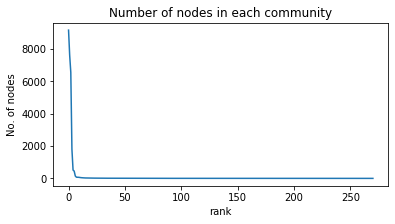

In [83]:
community_size = [len(x) for x in communities]
plt.figure(figsize=(6,3))
plt.plot(community_size)
plt.xlabel('rank')
plt.ylabel('No. of nodes')
plt.title("Number of nodes in each community")
plt.savefig("size_of_communities.png", dpi=600)

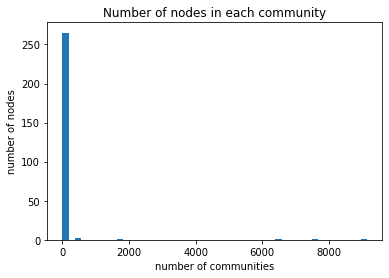

In [176]:
import scipy.stats as stats

plt.hist(community_size, bins = 50)  
plt.xlabel('number of communities')
plt.ylabel('number of nodes')
plt.title("Number of nodes in each community")
plt.savefig("size_of_communities.png", dpi=600)

In [74]:
subG_l1 = DiG.subgraph(communities[0])

In [75]:
print(nx.info(subG_l1))

Name: 
Type: DiGraph
Number of nodes: 9140
Number of edges: 54697
Average in degree:   5.9844
Average out degree:   5.9844


In [159]:
from itertools import count

def draw(g, attr, filename): 
    colors = [attr[x] for x in list(g.nodes)]
    
    nodes = [x for _,x in sorted(zip(colors, g.nodes))]
    colors = sorted(colors)
    pos = nx.spring_layout(g)
    ec = nx.draw_networkx_edges(g, pos, alpha=0.7)
    nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color=colors, alpha = 0.8,
                                with_labels=False, node_size=20, cmap=plt.cm.jet)
    plt.colorbar(nc)
    plt.axis('off')
    plt.savefig(filename)

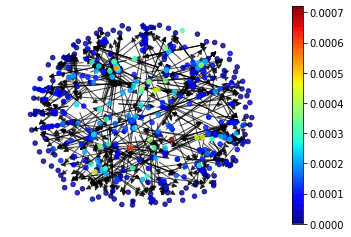

In [160]:
subG_l6 = DiG.subgraph(communities[5])
draw(subG_l6, centrality["outDegree"], "subG_l6.png")

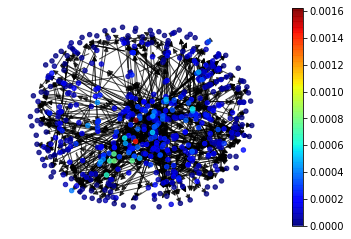

In [161]:
subG_l5 = DiG.subgraph(communities[4])
draw(subG_l5, centrality["outDegree"], "subG_l5.png")

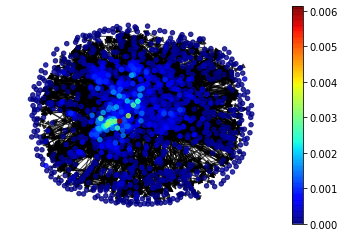

In [162]:
subG_l4 = DiG.subgraph(communities[3])
draw(subG_l4, centrality["outDegree"], "subG_l4.png")

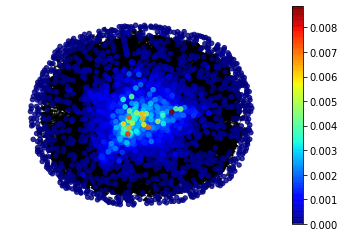

In [163]:
subG_l3 = DiG.subgraph(communities[2])
draw(subG_l3, centrality["outDegree"], "subG_l3.png")

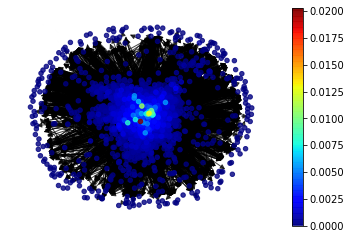

In [164]:
subG_l2 = DiG.subgraph(communities[1])
draw(subG_l2, centrality["outDegree"], "subG_l2.png")

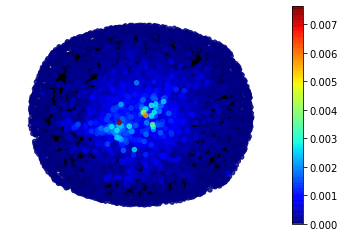

In [165]:
subG_l1 = DiG.subgraph(communities[0])
draw(subG_l1, centrality["outDegree"], "subG_l1.png")